In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import json
# from src.utils import rewrite_program_postgres, str_to_program_postgres
import seaborn as sns

CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

budget: 15
budget: 15, # data: 20, f1_median: 0.214, runtime_median: 154.0
budget: 15, # data: 20, f1_median: 0.225, runtime_median: 177.0
budget: 15, # data: 20, f1_median: 0.306, runtime_median: 160.0
budget: 15, # data: 20, f1_median: 0.784, runtime_median: 144.0
budget: 15, # data: 20, f1_median: 0.621, runtime_median: 144.0
budget: 15, # data: 20, f1_median: 0.272, runtime_median: 160.0
budget: 15, # data: 20, f1_median: 0.35, runtime_median: 164.0
budget: 15, # data: 20, f1_median: 0.216, runtime_median: 136.0
budget: 15, # data: 20, f1_median: 0.458, runtime_median: 167.0
budget: 15, # data: 20, f1_median: 0.479, runtime_median: 154.0
budget: 15, # data: 20, f1_median: 0.127, runtime_median: 173.0
budget: 15, # data: 20, f1_median: 0.237, runtime_median: 162.0
budget: 15, # data: 20, f1_median: 0.188, runtime_median: 178.0
budget: 20
budget: 20, # data: 20, f1_median: 0.724, runtime_median: 212.0
budget: 20, # data: 20, f1_median: 0.671, runtime_median: 247.0
budget: 20, # data:

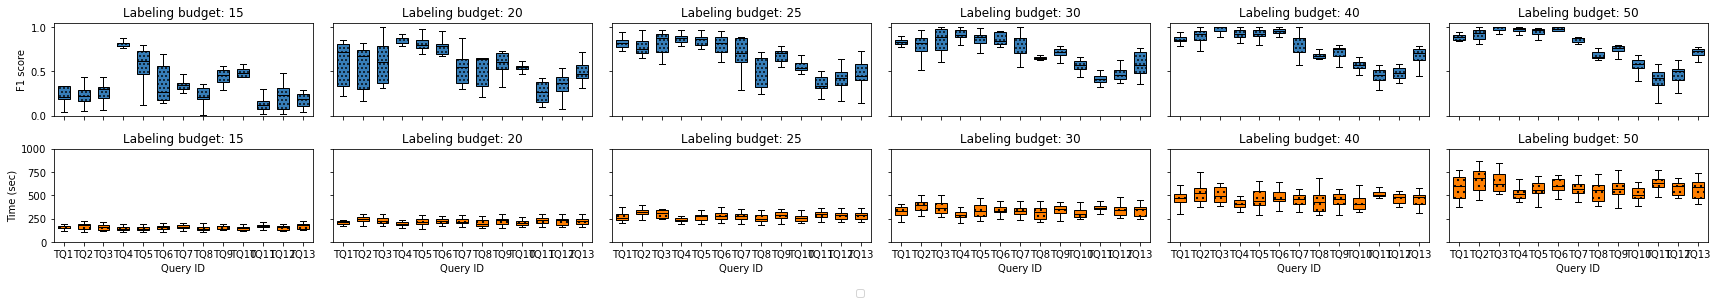

In [14]:
def plot_scene_graph(budgets):
    query_strs = [
        "Conjunction(Conjunction(DistanceSmall_100(o0, o1), Eastward2(o0)), Eastward2(o1))",
        "Conjunction(Conjunction(DistanceSmall_100(o0, o1), Eastward3(o0)), Eastward3(o1))",
        "Conjunction(Conjunction(DistanceSmall_100(o0, o1), Eastward4(o0)), Eastward4(o1))",
        "Conjunction(Eastward2(o0), HighAccel_2(o0)); Conjunction(Eastward2(o1), HighAccel_2(o1))",
        "Conjunction(Eastward3(o0), HighAccel_2(o0)); Conjunction(Eastward3(o1), HighAccel_2(o1))",
        "Conjunction(Eastward4(o0), HighAccel_2(o0)); Conjunction(Eastward4(o1), HighAccel_2(o1))",
        "Conjunction(Southward1Upper(o0), Westward2(o1)); Conjunction(Westward2(o0), Westward2(o1))",
        "Duration(Conjunction(Conjunction(DistanceSmall_100(o0, o1), Eastward2(o1)), Eastward3(o0)), 10)",
        "Duration(Conjunction(Conjunction(DistanceSmall_100(o0, o1), Eastward3(o1)), Eastward4(o0)), 10)",
        "Duration(Conjunction(Conjunction(Eastward2(o1), Eastward3(o0)), Faster_1.5(o0, o1)), 10)",
        "Duration(Conjunction(Conjunction(Eastward3(o1), Eastward4(o0)), Faster_1.5(o0, o1)), 10)",
        "Duration(Conjunction(Eastward2(o0), Eastward4(o1)), 5); Duration(Conjunction(Eastward2(o0), Eastward3(o1)), 5)",
        "Duration(Conjunction(Eastward2(o1), Eastward4(o0)), 5); Duration(Conjunction(Eastward2(o1), Eastward3(o0)), 5)"
    ]
    
    fig, axs = plt.subplots(2, len(budgets), figsize = (4*len(budgets), 4)) 
    
    exp_dir = "/Users/zhangenhao/Desktop/UW/Research/equi-vocal-demo/EQUI-VOCAL/outputs_test/warsaw/stats/vocal_postgres-topk"
    
    for col_id, budget in enumerate(budgets):
        print("budget:", budget)
        query_id = ["TQ{}".format(i) for i in range(1, len(query_strs) + 1)]
        handles_f1 = []
        handles_runtime = []
        legend_labels = []
        
#         # Quivr
#         quivr_f1_data = []
#         quivr_runtime_data = []
#         for query_str in query_strs:
#             quivr_f1 = []
#             quivr_runtime = []
#             try:
#                 for run in range(20):
#                     with open(os.path.join(exp_dir, 
#                                            "stats", 
#                                            "quivr_original_no_kleene/nip_2-nin_10-npred_5-n_nontrivial_None-n_trivial_None-depth_3-max_d_1-thread_1-lru_None",
#                                            "{}-{}.json".format(query_str, run)), "r") as f:
#                         quivr_stats = json.load(f)
#                     quivr_runtime_per_run = quivr_stats["runtime"]
#                     quivr_f1_per_run = quivr_stats["score_median"]
#                     quivr_f1.append(quivr_f1_per_run)
#                     quivr_runtime.append(quivr_runtime_per_run)

#                 quivr_x = list(range(12, 51))
#                 x_idx = quivr_x.index(budget)
#                 quivr_f1 = np.array(quivr_f1)
#                 quivr_runtime = np.array(quivr_runtime)
#                 quivr_f1 = quivr_f1[:, x_idx]
#                 quivr_runtime = quivr_runtime[:, x_idx]        
#             except Exception as err:
#                 print(err)
#                 pass
#             quivr_f1_data.append(np.median(quivr_f1))
#             quivr_runtime_data.append(np.median(quivr_runtime))
#         axs[col_id].bar(np.array(range(len(quivr_f1_data)))*4-2, quivr_f1_data, 1, label="Quivr", color=CB_color_cycle[1], hatch = '//', edgecolor="black")
#         print("quivr", quivr_f1_data)
        
        # VOCAL
        f1_data = []
        runtime_data = []
        for query_str in query_strs:
            f1 = []
            runtime = []
            try:
                with open(os.path.join(exp_dir, "{}.json".format(query_str)), "r") as f:
                    stats = json.load(f)
                x = [15, 20, 25, 30, 40, 50]
                x_idx = x.index(budget)
                runtime = np.array(stats["runtime"])
                f1 = np.array(stats["score_median"])
                f1 = f1[:, x_idx]
                runtime = runtime[:, x_idx]
                if np.all(f1 == -1):
                    f1 = np.zeros_like(f1)
                else:
                    f1[f1 == -1] = np.nan
                f1 = f1[~np.isnan(f1)]
                if np.all(runtime == -1):
                    runtime = np.zeros_like(runtime)
                else:
                    runtime[runtime == -1] = np.nan
                runtime = runtime[~np.isnan(runtime)]
            except:
                pass
            print("budget: {}, # data: {}, f1_median: {}, runtime_median: {}".format(budget, len(f1), np.round(np.median(f1), 3), np.round(np.median(runtime))))
            f1_data.append(f1)
            runtime_data.append(runtime)  
        
        bp_f1 = axs[0][col_id].boxplot(f1_data, 
                       positions=np.array(range(len(f1_data))), 
                       sym='.', widths=0.6, showfliers=False, patch_artist=True, boxprops=dict(facecolor=CB_color_cycle[0], hatch = '...'),
                       medianprops = dict(color='black'))   
        bp_runtime = axs[1][col_id].boxplot(runtime_data, 
                       positions=np.array(range(len(runtime_data))), 
                       sym='.', widths=0.6, showfliers=False, patch_artist=True, boxprops=dict(facecolor=CB_color_cycle[1], hatch = '..'),
                       medianprops = dict(color='black'))   
        handles_f1.append(bp_f1["boxes"][0])
        handles_runtime.append(bp_runtime["boxes"][0])
        
        axs[0][col_id].set(xlabel="Query ID", ylabel="F1 score")
        axs[0][col_id].set_ylim(bottom=0, top=1.05)
        axs[0][col_id].set_xticks(range(0, len(query_id), 1))
        axs[0][col_id].set_xticklabels(query_id)
        axs[0][col_id].title.set_text("Labeling budget: {}".format(budget))
        
        axs[1][col_id].set(xlabel="Query ID", ylabel="Time (sec)")
        axs[1][col_id].set_xticks(range(0, len(query_id), 1))
        axs[1][col_id].set_xticklabels(query_id)
        axs[1][col_id].title.set_text("Labeling budget: {}".format(budget))
        axs[1][col_id].set_ylim(bottom=0, top=1000)
            
    for ax in axs.flat:
        ax.label_outer()
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, prop={"size":10}, loc='upper center', bbox_to_anchor=(0.5, 0.0),
              fancybox=True, shadow=False, ncol=3)
    plt.subplots_adjust(bottom=0.15)
    fig.tight_layout()
    
plot_scene_graph(budgets=[15, 20, 25, 30, 40, 50])